# Вариант №7.

In [2]:
variant = 7

Если что, ячейки можно скрывать по разделам `Markdown`.

# Импорты и определения

### Библиотеки и их настройка

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math as m
from IPython.display import display, Markdown  # для вывода формул в консоль

In [4]:
def mprint(*strings):  # функция вывода маркдаун в консоль
    for s in strings:
        display(Markdown(s))


def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table


# можно выводить latex в надписях matplotlib
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

### Парсинг вариантов

In [5]:
%pwd

'/Users/retrobanner/Projects/mephi_stats/bdz/var_7_2'

In [6]:
# считываем столбики для варианта
datas = pd.read_excel("../bdz_vars.xls", index_col=0).loc[variant]

datas.head()

1.1         C9 C10 C11
1.2                 C9
2.1, 3.1            C9
2.2, 3.2            C9
2.3, 3.3       C11 C12
Name: 7, dtype: object

In [7]:
# создаём словарик: задание -> список столбцов
variant_dict = dict()
for tasks in datas.index:
    for task in tasks.split(", "):
        variant_dict[task] = datas[tasks].replace("С", "C").replace("А", "A").split(" ")

print(variant_dict)

{'1.1': ['C9', 'C10', 'C11'], '1.2': ['C9'], '2.1': ['C9'], '3.1': ['C9'], '2.2': ['C9'], '3.2': ['C9'], '2.3': ['C11', 'C12'], '3.3': ['C11', 'C12'], '2.4': ['C11', 'C12'], '3.4': ['C11', 'C12'], '4': ['C9'], '5': ['C11', 'C12'], '6': ['C2', 'C5'], '7': ['C5', 'C4'], '8.1': ['C11', 'C12'], '8.2': ['C9', 'C10', 'C11'], '9.1': ['C11', 'C13'], '9.2': ['C11', 'C13'], '9.3': ['C11', 'C4', 'C13']}


### Считываем информацию из excel

In [8]:
dfs = pd.read_excel("../bdz_data.xls", sheet_name=None)
dfs.keys()

dict_keys(['description', 'A - aaup', 'B - bodyfat', 'C - plasma', 'D - homedat'])

In [9]:
# создаём словарик: буква -> название листа в excel
sheet_dict = dict()
for value in list(dfs.keys())[1:]:
    key = value[0]
    sheet_dict[key] = value
print(sheet_dict)

{'A': 'A - aaup', 'B': 'B - bodyfat', 'C': 'C - plasma', 'D': 'D - homedat'}


In [10]:
# функция: задание -> необходимые данные
def data(task):
    X = []
    for data in variant_dict[task]:
        sheet = data[0]
        column = data
        df = dfs[sheet_dict[sheet]][column]
        X.append(df)
    return X

### Дополнительные функции

In [11]:
def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

# Раздел 1. Описательные статистики

## 1.1 Выборочные характеристики

### Условие

Анализируемый признак 1 – `C9` (Number of alcoholic drinks consumed per week)

Анализируемый признак 2 – `C10` (Cholesterol consumed (mg per day))

Анализируемый признак 3 – `C11` (Dietary beta-carotene consumed (mcg per day))

### Определения

In [12]:
columns = data("1.1")
for i in columns:
    print(i.head())

0     0.0
1     0.0
2    14.1
3     0.5
4     0.0
Name: C9, dtype: float64
0    170.3
1     75.8
2    257.9
3    332.6
4    170.8
Name: C10, dtype: float64
0    1945
1    2653
2    6321
3    1061
4    2863
Name: C11, dtype: int64


### Привести формулы расчёта выборочных характеристик

| Выборочная характеристика                | Формула расчёта                                                                                                                                                                                                                                 |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Объём выборки                            | $n$                                                                                                                                                                                                                                             |
| Среднее                                  | $\overline x = \dfrac{1}{n} \sum\limits_{i = 1}^{n} x_i$                                                                                                                                                                                        |
| Выборочная дисперсия                     | $D_X^* = \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2$                                                                                                                                                                 |
| Выборочное среднеквадратичное отклонение | $\sigma_X^* = \sqrt{D_X^*} =\sqrt{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2}$                                                                                                                                       |
| Выборочный коэффициент асимметрии        | $\gamma_X^* = \dfrac{\mu_{3,X}^*}{\left(\sigma_X^*\right)^3} = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^3}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^{\frac{3}{2}}}$ |
| Выборочный эксцесс                       |      $\varepsilon_X^* = \dfrac{\mu_{4,X}^*}{\left(\sigma_X^*\right)^4} - 3 = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^4}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^2} - 3$                                                                                                                                                                                                                                           |


### Рассчитать выборочные характеристики

`pd.skew()` возвращает несмещенный выборочный коэффициент асимметрии, поэтому лучше использовать `stats.skew(bias=True)`, чтобы его получить.

То же самое касается функции `kurtosis()`.

In [13]:
for i, X in enumerate(columns, start=1):
    mean_ = X.mean()
    D = X.var(ddof=0)
    d = X.std(ddof=0)
    g = stats.skew(X, bias=True)
    e = stats.kurtosis(X, bias=True)
    output = f"$\\mathbf{{X_{i}}}:$ \
        $\\overline x_{i} =$ {mean_:.2f}; \
        $D^*_{{X_{i}}} =$ {D:.2f}; \
        $\\sigma^*_{{X_{i}}} =$ {d:.2f}; \
        $\\gamma^*_{{X_{i}}} =$ {g:.2f}; \
        $\\varepsilon^*_{{X_{i}}} =$ {e:.2f} \
        "
    mprint(output)

$\mathbf{X_1}:$         $\overline x_1 =$ 3.28;         $D^*_{X_1} =$ 151.37;         $\sigma^*_{X_1} =$ 12.30;         $\gamma^*_{X_1} =$ 13.76;         $\varepsilon^*_{X_1} =$ 217.82         

$\mathbf{X_2}:$         $\overline x_2 =$ 242.46;         $D^*_{X_2} =$ 17366.48;         $\sigma^*_{X_2} =$ 131.78;         $\gamma^*_{X_2} =$ 1.47;         $\varepsilon^*_{X_2} =$ 3.34         

$\mathbf{X_3}:$         $\overline x_3 =$ 2185.60;         $D^*_{X_3} =$ 2165445.23;         $\sigma^*_{X_3} =$ 1471.55;         $\gamma^*_{X_3} =$ 1.61;         $\varepsilon^*_{X_3} =$ 3.40         

| Выборочная характеристика                | Признак 1 | Признак 2 | Признак 3  |
| ---------------------------------------- | --------- | --------- | ---------- |
| Среднее                                  | 3.28      | 242.46    | 2185.60    |
| Выборочная дисперсия                     | 151.37    | 17366.48  | 2165445.23 |
| Выборочное среднеквадратичное отклонение | 12.30     | 131.78    | 1471.55    |
| Выборочный коэффициент асимметрии        | 13.76     | 1.47      | 1.61       |
| Выборочный эксцесс                       | 217.82    | 3.34      | 3.40       |


## 1.2 Группировка и гистограммы частот

### Условие

Анализируемый признак – `C9` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

### Определения

In [14]:
X = data("1.2")[0]
X

0       0.0
1       0.0
2      14.1
3       0.5
4       0.0
       ... 
310     2.6
311     2.2
312     4.0
313     2.2
314     0.2
Name: C9, Length: 315, dtype: float64

In [15]:
print(n := len(X))

315


In [16]:
X = pd.DataFrame(X.values, columns=["value"])
X.head()

,value
0,0.0
1,0.0
2,14.1
3,0.5
4,0.0


### Выбрать число групп

In [17]:
maximum = max(X["value"])
minimum = min(X["value"])
k = round(1 + 1.3 * m.log(n))
mprint(f"$\\mathbf{{X}}: \\max = {maximum}, \\min = {minimum}, n = {n}, k = {k}$")

$\mathbf{X}: \max = 203.0, \min = 0.0, n = 315, k = 8$

In [18]:
X["group"] = pd.cut(X["value"], bins=k)
X.head()

,value,group
0,0.0,"(-0.203, 25.375]"
1,0.0,"(-0.203, 25.375]"
2,14.1,"(-0.203, 25.375]"
3,0.5,"(-0.203, 25.375]"
4,0.0,"(-0.203, 25.375]"


In [19]:
delta_min = np.min(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
delta_max = np.max(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
mprint(f"Ширина интервалов: от {delta_min:.2f} до {delta_max:.2f}")

Ширина интервалов: от 25.38 до 25.58

| Число групп | Обоснование выбора числа групп                 | Ширина интервалов |
| ----------- | ---------------------------------------------- | ----------------- |
| 8           | Формула Стерджесса: $k \approx 1 + 1,3 \ln{n}$ | от 25.38 до 25.58 |


### Построить таблицу частот

In [20]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="Номер интервала"))
groups["low edge"] = [interval.left for interval in X["group"].cat.categories]
groups["high edge"] = [interval.right for interval in X["group"].cat.categories]
groups["frequency"] = X["group"].value_counts().sort_index().values
groups["relative frequency"] = groups["frequency"] / n
groups["cumulative frequency"] = groups["frequency"].cumsum()
groups["cumulative relative frequency"] = groups["cumulative frequency"] / n
groups

,low edge,high edge,frequency,relative frequency,cumulative frequency,cumulative relative frequency
Номер интервала,,,,,,
1,-0.203,25.375,312,0.990476,312,0.990476
2,25.375,50.750,2,0.006349,314,0.996825
3,50.750,76.125,0,0.000000,314,0.996825
4,76.125,101.500,0,0.000000,314,0.996825
5,101.500,126.875,0,0.000000,314,0.996825
6,126.875,152.250,0,0.000000,314,0.996825
7,152.250,177.625,0,0.000000,314,0.996825
8,177.625,203.000,1,0.003175,315,1.000000


In [21]:
# Чтобы быстрее заполнить табличку
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | cumulative frequency | cumulative relative frequency |
|---|---|---|---|---|---|---|
| 1 | -0.2 | 25.38 | 312.0 | 0.99 | 312.0 | 0.99 |
| 2 | 25.38 | 50.75 | 2.0 | 0.01 | 314.0 | 1.0 |
| 3 | 50.75 | 76.12 | 0.0 | 0.0 | 314.0 | 1.0 |
| 4 | 76.12 | 101.5 | 0.0 | 0.0 | 314.0 | 1.0 |
| 5 | 101.5 | 126.88 | 0.0 | 0.0 | 314.0 | 1.0 |
| 6 | 126.88 | 152.25 | 0.0 | 0.0 | 314.0 | 1.0 |
| 7 | 152.25 | 177.62 | 0.0 | 0.0 | 314.0 | 1.0 |
| 8 | 177.62 | 203.0 | 1.0 | 0.0 | 315.0 | 1.0 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Накопленная частота | Относительная накопленная частота |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------- | --------------------------------- |
| 1               | -0.2           | 25.38           | 312.0   | 0.99                  | 312.0               | 0.99                              |
| 2               | 25.38          | 50.75           | 2.0     | 0.01                  | 314.0               | 1.0                               |
| 3               | 50.75          | 76.12           | 0.0     | 0.0                   | 314.0               | 1.0                               |
| 4               | 76.12          | 101.5           | 0.0     | 0.0                   | 314.0               | 1.0                               |
| 5               | 101.5          | 126.88          | 0.0     | 0.0                   | 314.0               | 1.0                               |
| 6               | 126.88         | 152.25          | 0.0     | 0.0                   | 314.0               | 1.0                               |
| 7               | 152.25         | 177.62          | 0.0     | 0.0                   | 314.0               | 1.0                               |
| 8               | 177.62         | 203.0           | 1.0     | 0.0                   | 315.0               | 1.0                               |

### Построить гистограммы частот и полигоны частот

In [22]:
bin_centers = (groups["low edge"] + groups["high edge"]) / 2
width = groups["high edge"] - groups["low edge"]

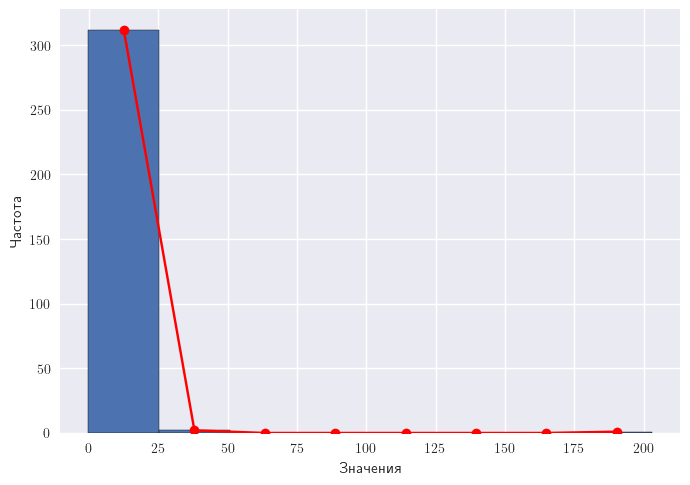

In [23]:
plt.bar(bin_centers, groups["frequency"], width=width, edgecolor="black")
plt.plot(bin_centers, groups["frequency"], marker="o", color="r")

plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

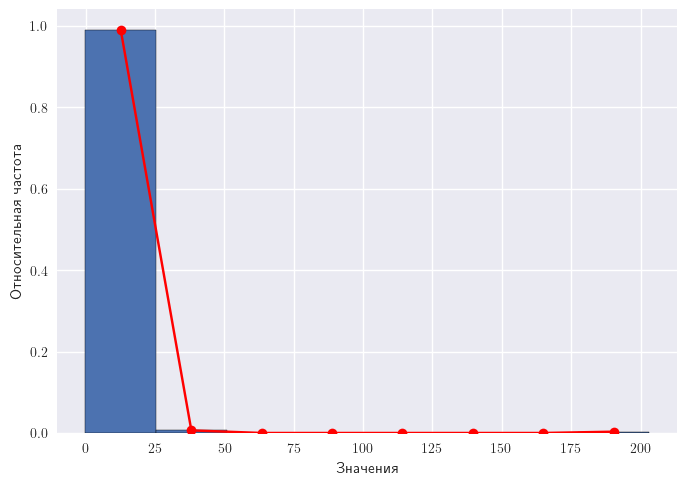

In [24]:
plt.bar(
    bin_centers,
    groups["relative frequency"],
    width=width,
    edgecolor="black",
)
plt.plot(bin_centers, groups["relative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

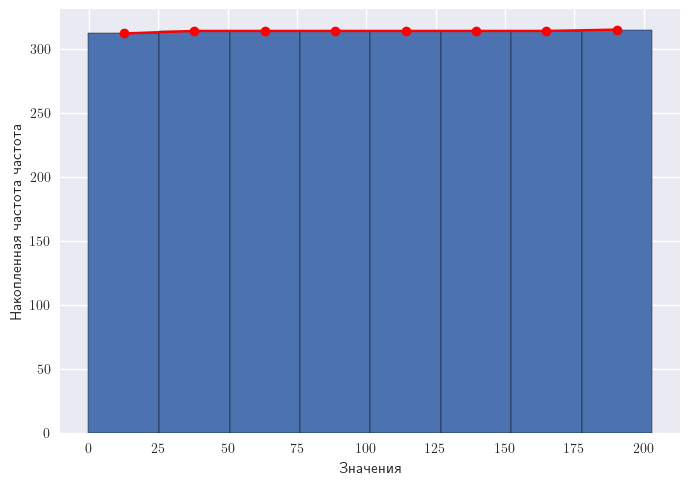

In [25]:
plt.bar(
    bin_centers,
    groups["cumulative frequency"],
    width=width,
    edgecolor="black",
)
plt.plot(bin_centers, groups["cumulative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Накопленная частота частота")
plt.show()

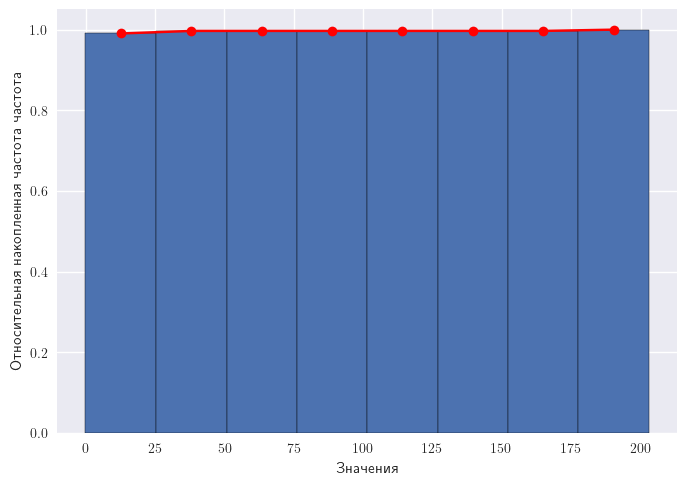

In [26]:
plt.bar(
    bin_centers,
    groups["cumulative relative frequency"],
    width=width,
    edgecolor="black",
)
plt.plot(bin_centers, groups["cumulative relative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Относительная накопленная частота частота")
plt.show()

А теперь всё на одном графике.

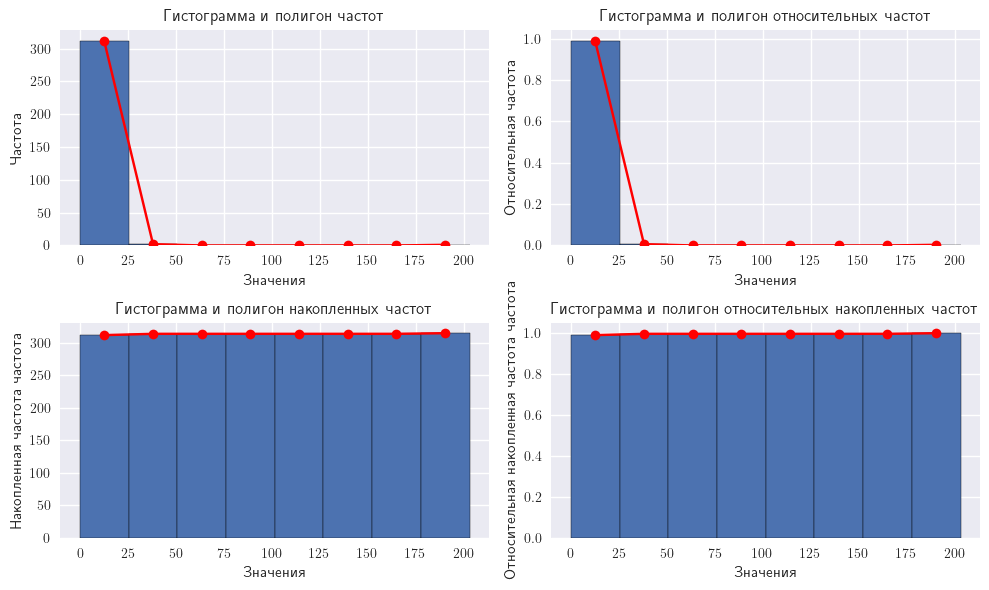

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].bar(
    bin_centers,
    groups["frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 0].plot(bin_centers, groups["frequency"], marker="o", color="r")
axes[0, 0].set_xlabel("Значения")
axes[0, 0].set_ylabel("Частота")
axes[0, 0].set_title("Гистограмма и полигон частот")

axes[0, 1].bar(
    bin_centers,
    groups["relative frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 1].plot(bin_centers, groups["relative frequency"], marker="o", color="r")
axes[0, 1].set_xlabel("Значения")
axes[0, 1].set_ylabel("Относительная частота")
axes[0, 1].set_title("Гистограмма и полигон относительных частот")

axes[1, 0].bar(
    bin_centers,
    groups["cumulative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 0].plot(bin_centers, groups["cumulative frequency"], marker="o", color="r")
axes[1, 0].set_xlabel("Значения")
axes[1, 0].set_ylabel("Накопленная частота частота")
axes[1, 0].set_title("Гистограмма и полигон накопленных частот")

axes[1, 1].bar(
    bin_centers,
    groups["cumulative relative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 1].plot(
    bin_centers, groups["cumulative relative frequency"], marker="o", color="r"
)
axes[1, 1].set_xlabel("Значения")
axes[1, 1].set_ylabel("Относительная накопленная частота частота")
axes[1, 1].set_title("Гистограмма и полигон относительных накопленных частот")

plt.tight_layout()
plt.show()

### Построить эмпирическую фукнцию распределения

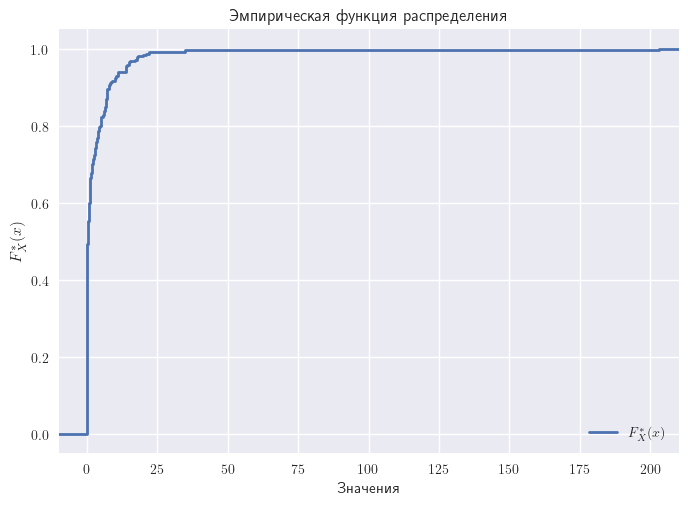

In [28]:
X_sorted = np.sort(X["value"])
X_sorted = np.concatenate(([-10000], X_sorted, [10000]))
F = np.arange(1, n + 1) / n
F = np.concatenate(([0], F, [1]))
plt.step(X_sorted, F, where="post", label=r"$F_X^*(x)$", linewidth=2)
plt.xlim(-10, 210)
plt.xlabel("Значения")
plt.ylabel("$F^*_X(x)$")
plt.legend()
plt.title("Эмпирическая функция распределения")
plt.show()

# Раздел 2. Интервальные оценки

## 2.1 Доверительные интервалы для математического ожидания

### Условие

Анализируемый признак – `C9` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

Оцениваемый параметр – `m`

### Определения

In [29]:
X = data("2.1")[0]
X.head()

0     0.0
1     0.0
2    14.1
3     0.5
4     0.0
Name: C9, dtype: float64

In [30]:
print(n := len(X))

315


### Привести формулы расчёта доверительных интервалов

Так как у нас есть только выборка, мы не можем знать параметров генеральной совокупности(в том числе $m$ и $\sigma$), поэтому будем рассчитывать доверительные интервалы, используя данный факт. 

В данном случае `стьюдентизованное среднее` выступает в качестве центральной статистики:

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\overline {\mathbf{X}} - \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |
| Верхняя граница                  | $\overline {\mathbf{X}} + \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |


### Рассчитать доверительные интервалы

In [31]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = stats.sem(X)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n - 1, loc=X.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,1.479993,1.913266,2.133938
Верхняя граница,5.078738,4.645464,4.424792


In [32]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 1.48 | 1.91 | 2.13 |
| Верхняя граница | 5.08 | 4.65 | 4.42 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 1.48            | 1.91            | 2.13           |
| Верхняя граница                  | 5.08            | 4.65            | 4.42           |

## 2.2 Доверительные интервалы для дисперсии

### Условие

Анализируемый признак – `C9` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

Оцениваемый параметр – $\sigma^2$

### Определения

In [33]:
X = data("2.2")[0]
X.head()

0     0.0
1     0.0
2    14.1
3     0.5
4     0.0
Name: C9, dtype: float64

In [34]:
print(n := len(X))

315


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, \left(n-1\right)}}$ |
| Верхняя граница                  | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, \left(n-1\right)}}$ |


### Рассчитать доверительные интервалы

In [35]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    chi2_upper, chi2_lower = stats.chi2.interval(1 - alpha, df=n - 1)
    intervals[f"$\\alpha =$ {alpha}"] = [
        (n - 1) * X.var(ddof=1) / chi2_lower,
        (n - 1) * X.var(ddof=1) / chi2_upper,
    ]
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,124.723898,130.641731,133.815823
Верхняя граница,188.311413,178.715100,174.054751


In [36]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 124.72 | 130.64 | 133.82 |
| Верхняя граница | 188.31 | 178.72 | 174.05 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 124.72          | 130.64          | 133.82         |
| Верхняя граница                  | 188.31          | 178.72          | 174.05         |

## 2.3. Доверительные интервалы для разности мат. ожиданий

### Условие

Анализируемый признак 1 – `C11` (Dietary beta-carotene consumed (mcg per day))

Анализируемый признак 2 – `C12` (Dietary retinol consumed (mcg per day))

Объёмы выборок – $n_1 = n_2 = 315$

Оцениваемый параметр – $m_1 - m_2$

### Определения

In [37]:
X1, X2 = data("2.3")
X1.head(), X2.head()

(0    1945
 1    2653
 2    6321
 3    1061
 4    2863
 Name: C11, dtype: int64,
 0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64)

In [38]:
print(n1 := len(X1), n2 := len(X2))

315 315


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                                                                                                 |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) - t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| Верхняя граница                  | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) + t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| $S$                              | $\sqrt{\dfrac{(n_1 - 1)S_1^2 + (n_2-1) S_2^2}{n_1 + n_2 -2}}  $                                                                                                            |


### Рассчитать доверительные интервалы

In [39]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = m.sqrt(
    ((n1 - 1) * X1.var(ddof=1) + (n2 - 1) * X2.var(ddof=1))
    / (n1 + n2 - 2)
    * (1 / n1 + 1 / n2)
)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n1 + n2 - 2, loc=X1.mean() - X2.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,1121.815665,1177.259702,1205.562966
Верхняя граница,1583.962113,1528.518076,1500.214812


In [40]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 1121.82 | 1177.26 | 1205.56 |
| Верхняя граница | 1583.96 | 1528.52 | 1500.21 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 1121.82         | 1177.26         | 1205.56        |
| Верхняя граница                  | 1583.96         | 1528.52         | 1500.21        |

## 2.4. Доверительные интервалы для отношения дисперсий

### Условие

Анализируемый признак 1 – `C11` (Dietary beta-carotene consumed (mcg per day))

Анализируемый признак 2 – `C12` (Dietary retinol consumed (mcg per day))

Объёмы выборок – $n_1 = n_2 = 315$

Оцениваемый параметр – $\dfrac{\sigma_1^2}{\sigma_2^2}$


### Определения

In [41]:
X1, X2 = data("2.4")
X1.head(), X2.head()

(0    1945
 1    2653
 2    6321
 3    1061
 4    2863
 Name: C11, dtype: int64,
 0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64)

In [42]:
print(n1 := len(X1), n2 := len(X2))

315 315


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                       |
| -------------------------------- | --------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{S_1^2}{S_2^2} \cdot F_{\frac{\alpha}{2}, (n_1-1, n_2-1)}$     |
| Верхняя граница                  | $\dfrac{S_1^2}{S_2^2} \cdot F_{1 - \frac{\alpha}{2}, (n_1-1, n_2-1)}$ |

### Рассчитать доверительные интервалы

In [43]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.f.interval(
        1 - alpha, dfn=n1 - 1, dfd=n2 - 1, loc=0, scale=X1.var(ddof=1) / X2.var(ddof=1)
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,4.673990,5.012156,5.194250
Верхняя граница,8.372497,7.807612,7.533901


In [44]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 4.67 | 5.01 | 5.19 |
| Верхняя граница | 8.37 | 7.81 | 7.53 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 4.67            | 5.01            | 5.19           |
| Верхняя граница                  | 8.37            | 7.81            | 7.53           |

# Раздел 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

## 3.1. Проверка статистических гипотез о математических ожиданиях

### Условие

Анализируемый признак – `C9` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

Статистическая гипотеза: $H_0:\ m = m_0;\ \ \ H':\ m \neq m_0$

### Определения

In [45]:
X = data("3.1")[0]
X.head()

0     0.0
1     0.0
2    14.1
3     0.5
4     0.0
Name: C9, dtype: float64

In [46]:
print(n := len(X))

315


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------ |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline X - m_0}{S/\sqrt{n}}$                              |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n - 1)$                                                               |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n - 1}$                                    |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$ |


### Выбрать произвольные значения $m_0$ и проверить статистические гипотезы

In [47]:
alpha = 0.1
m0_list = [0, 2, 4]

mprint(r"### T-test")
for m0 in m0_list:
    z, p_value = stats.ttest_1samp(X, m0)
    mprint(
        r"---",
        f"$H_0: m = m_0 = {m0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### T-test

---

$H_0: m = m_0 = 0$

$z_{выб} =$ 4.72

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: m = m_0 = 2$

$z_{выб} =$ 1.84

$p =$ 0.07

$H_0$ отклоняется

---

$H_0: m = m_0 = 4$

$z_{выб} =$ -1.04

$p =$ 0.30

$H_0$ принимается

| $m_0$ | Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод      |
| ----- | ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------- |
| 0     | 0.1                | 4.72                                         | 0.00      | $H_0$ отклоняется      | $m \neq 0$ |
| 2     | 0.1                | 1.84                                         | 0.07      | $H_0$ отклоняется      | $m \neq 2$ |
| 4     | 0.1                | -1.04                                        | 0.30      | $H_0$ принимается      | $m = 4$    |


## 3.2 Проверка статистических гипотез о дисперсиях

### Условие

Анализируемый признак – `C9` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

Статистическая гипотеза: $H_0:\ \sigma = \sigma_0;\ \ \ H':\ \sigma \neq \sigma_0$

### Определения

In [48]:
X = data("3.2")[0]
X.head()

0     0.0
1     0.0
2    14.1
3     0.5
4     0.0
Name: C9, dtype: float64

In [49]:
print(n := len(X))

315


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $m$, значит используем $\chi^2-test$.

|                                                                                  | Выражение                                                                 |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{(n - 1)S^2}{\sigma_0^2}$                                      |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(n - 1)$                                                           |
| Формулы расчёта критических точек                                                | $\chi^2_{\frac{\alpha}{2}, n - 1},\ \chi^2_{1 - \frac{\alpha}{2}, n - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$  |


### Выбрать произвольные значения $\sigma_0$ и проверить статистические гипотезы

In [50]:
def chisquare(X, value):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / value**2
    cdf = stats.chi2.cdf(z, df=n - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [51]:
alpha = 0.1
std0_list = [10, 12.5, 15]

mprint(r"### $\chi^2$-test")
for std0 in std0_list:
    z, p_value = chisquare(X, std0)
    mprint(
        r"---",
        f"$H_0: \\sigma = \\sigma_0 = {std0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### $\chi^2$-test

---

$H_0: \sigma = \sigma_0 = 10$

$z_{выб} =$ 476.82

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: \sigma = \sigma_0 = 12.5$

$z_{выб} =$ 305.16

$p =$ 0.74

$H_0$ принимается

---

$H_0: \sigma = \sigma_0 = 15$

$z_{выб} =$ 211.92

$p =$ 0.00

$H_0$ отклоняется

| $\sigma_0$ | Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод            |
| ---------- | ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------------- |
| 10         | 0.1                | 476.82                                      | 0.00      | $H_0$ отклоняется      | $\sigma \neq 10$ |
| 12.5         | 0.1                | 305.16                                       |   0.74    | $H_0$ принимается      | $\sigma = 12.5$ |
| 15         | 0.1                | 211.92                                       |  0.00     |   $H_0$ отклоняется    |  $\sigma \neq 15$   |

## 3.3 Проверка статистических гипотез о равенстве математических ожиданий

### Условие

Анализируемый признак 1 – `C11` (Dietary beta-carotene consumed (mcg per day))

Анализируемый признак 2 – `C12` (Dietary retinol consumed (mcg per day))

Объёмы выборок – $n_1 = n_2 = 315$

Статистическая гипотеза: $H_0:\ m_1 = m_2;\ \ \ H':\ m_1 \neq m_2$

### Определения

In [52]:
X1, X2 = data("3.3")
X1.head(), X2.head()

(0    1945
 1    2653
 2    6321
 3    1061
 4    2863
 Name: C11, dtype: int64,
 0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64)

In [53]:
print(n1 := len(X1), n2 := len(X2))

315 315


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                                                                                                  |
| -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline{X_1} - \overline{X_2}}{S\sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}}}$, где $S^2 = \dfrac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n_1 + n_2 - 2)$                                                                                                                                         |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n_1 + n_2 - 2}$                                                                                                              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                   |


### Проверить статистические гипотезы

In [54]:
alphas = [0.01, 0.05, 0.1]
z, p_value = stats.ttest_ind(X1, X2)
mprint(
    r"### two-sample T-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)
for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### two-sample T-test

$H_0: m_1 = m_2$

$z_{выб} =$ 15.13

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод          |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | -------------- |
| 0.01               | 15.13                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |
| 0.05               | 15.13                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |
| 0.1                | 15.13                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |


## 3.4 Проверка статистических гипотез о равенстве дисперсий

### Условие

Анализируемый признак 1 – `C11` (Dietary beta-carotene consumed (mcg per day))

Анализируемый признак 2 – `C12` (Dietary retinol consumed (mcg per day))

Объёмы выборок – $n_1 = n_2 = 315$

Статистическая гипотеза: $H_0:\ \sigma_1 = \sigma_2;\ \ \ H':\ \sigma_1 \neq \sigma_2$

### Определения

In [55]:
X1, X2 = data("3.4")
X1.head(), X2.head()

(0    1945
 1    2653
 2    6321
 3    1061
 4    2863
 Name: C11, dtype: int64,
 0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64)

In [56]:
print(n1 := len(X1), n2 := len(X2))

315 315


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                 |
| -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{S_1^2}{S_2^2}$                                                                |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(n_1 - 1,\ n_2 - 1)$                                                                    |
| Формулы расчёта критических точек                                                | $F_{\frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1},\ F_{1 - \frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                  |

### Проверить статистические гипотезы

In [57]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [58]:
alphas = [0.01, 0.05, 0.1]
z, p_value = Ftest(X1, X2)
mprint(
    r"### F-test",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### F-test

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 6.26

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 6.26                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |
| 0.05               | 6.26                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |
| 0.1                | 6.26                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |

# Раздел 4. Критерии согласия

## Условие

Анализируемый признак – `C9` (Number of alcoholic drinks consumed per week)

Объём выборки – $n$ = `315`

## Определения

In [59]:
X = data("4")[0]
X.head()

0     0.0
1     0.0
2    14.1
3     0.5
4     0.0
Name: C9, dtype: float64

In [60]:
print(n := len(X))

315


## 4.1. Критерий $\chi^2$ 

Теоретическое распределение - нормальное.

Статистическая гипотеза - $H_0:\ X \sim N;\ \ \ H':\ X \nsim N$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                         | Пояснение использованных обозначений                                                                                                                                                                                                                                                                                                                                               |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \sum\limits_{i=1}^{k} \dfrac{\left(n_i - n \cdot p_i\right)^2}{n \cdot p_i}$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $p_i$ - вероятность попадания случайной величины $\mathbf X$ в интервал $\Delta_i$ в условиях $H_0$, то есть, если $\Delta_i = (a_{i-1}, a_{i}]$, то $$p_i = \int\limits_{a_{i-1}}^{a_{i}}g(x)dx = G(a_{i}) - G(a_{i-1}).$$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - r - 1)$                                                               | $r$ - количество оцениваемых параметров у предполагаемого распределения $G$.                                                                                                                                                                                                                                                                                                       |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - r - 1}$                                                 | Малые значения $Z$ нам также подходят, поэтому критическая область выбирается правосторонней                                                                                                                                                                                                                                                                                       |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                |                                                                                                                                                                                                                                                                                                                                                                                    |

### Выбрать число групп

Область всевозможных значений предполагаемого распределения делят на $k$ групп(интервалов). Наше предполагаемое распределение - нормальное. Поэтому делим всю числовую прямую на $k$ интервалов.

Обычно выбирают число групп по формуле Стерджесса: $k \approx 1 + 1,3 \ln{n}$.

Однако критерий $\chi^2$ чувствителен к группам, для которых ожидаемые частоты $n \cdot p_i$ меньше 5. Поэтому при группировке нужно учитывать это.

Я поступал следующим образом:
1. Разбивал выборку на $k$ групп библиотечными функциями.
2. Левый конец первого интервала и правый конец второго интервала устремлял в $\infty$.
3. Рассчитывал $n \cdot p_i$, и в зависимости от этого соединял некоторые соседние интервалы.
4. Если нужно, подразбивал интервалы с большим $n \cdot p_i$.

In [61]:
k = round(1 + 1.3 * m.log(n))
k

8

In [62]:
frequences, bin_edges = np.histogram(X, bins=k)
bin_edges

array([  0.   ,  25.375,  50.75 ,  76.125, 101.5  , 126.875, 152.25 ,
       177.625, 203.   ])

Устремляю левый конец первого интервала в $-\infty$ и правый конец последнего интервала в $+\infty$. Можно считать, что точки $\pm1000$ - это $\pm\infty$, так как за интервал $(-1000, 1000)$, смотря по выборке, вероятность попадания ничтожно мала. Но в каких то случаях, нужно скорректировать эти значения.

In [63]:
bin_edges[0] = -1000
bin_edges[-1] = 1000
bin_edges

array([-1000.   ,    25.375,    50.75 ,    76.125,   101.5  ,   126.875,
         152.25 ,   177.625,  1000.   ])

Для каждого интервала $[a_{i-1}, a_i]$ найдём $p_i = G(a_i) - G(a_{i-1})$ - вероятность попадания случайной величины $\mathbf X$ в интервал $[a_{i-1}, a_i]$ в условиях $H_0$.

Напомним, что в данном случае теоретическое распределение - нормальное. Поэтому и будем использовать `stats.norm.cdf()`.

In [64]:
probabilities = np.diff(stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf(bin_edges))
probabilities

array([9.63518155e-01, 3.64233225e-02, 5.85204817e-05, 1.69592285e-09,
       7.77156117e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

Мы нашли вероятности попасть в каждый интервал. Теперь найдём ожидаемые частоты $n \cdot p_i$.

In [65]:
def get_expected_frequencies(bin_edges, n, cdf=stats.norm.cdf):
    probabilities = np.diff(cdf(bin_edges))
    return n * probabilities

In [66]:
get_expected_frequencies(
    bin_edges, n, cdf=stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf
)

array([3.03508219e+02, 1.14733466e+01, 1.84339517e-02, 5.34215697e-07,
       2.44804177e-13, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

Как видим, для третьего и всех последующих интервалов ожидаемые частоты меньше 5. Условие $n \cdot p_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [67]:
def merge_interval(bin_edges, expected_frequencies, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        expected_frequencies[i + 1] += expected_frequencies[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        expected_frequencies[i - 1] += expected_frequencies[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if expected_frequencies[i - 1] < expected_frequencies[i + 1]:
            bin_edges.pop(i)
            expected_frequencies[i - 1] += expected_frequencies[i]
        else:
            bin_edges.pop(i + 1)
            expected_frequencies[i + 1] += expected_frequencies[i]
    expected_frequencies.pop(i)

In [68]:
def adjust_intervals(bin_edges, n, distrib=stats.norm, k=None):
    """
    Функция для корректировки интервалов и вероятностей

    Параметры:
    bin_edges: Границы интервалов
    n: uint - объем выборки
    distrib: распределение, которое мы хотим использовать для подсчета вероятностей
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой ожидаемой частотой с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой ожидаемой частотой, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых ожидаемая частота большая, таким образом получая на выходе k >= len(intervals).
    """
    cdf = distrib.cdf
    ppf = distrib.ppf
    expected_frequencies = get_expected_frequencies(bin_edges, n, cdf=cdf).tolist()
    if type(bin_edges) == np.ndarray:
        bin_edges = bin_edges.tolist()

    # Слияние интервалов с ожидаемой частотой <= 5
    i = 0
    while True:
        if expected_frequencies[i] <= 5:
            merge_interval(bin_edges, expected_frequencies, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной ожидаемой частотой.
    if k is not None:
        while len(bin_edges) < k + 1:
            max_expected_frequency = max(expected_frequencies)

            # если максимальная ожидаемая частота меньше 10, то нельзя подразбивать интервалы
            if max_expected_frequency < 10:
                break

            max_index = expected_frequencies.index(max_expected_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что ожидаемая частота в интервалах (a, c) и (c, b) как минимум 5
            c = (ppf(cdf(a) + 5 / n) + ppf(cdf(b) - 5 / n)) / 2

            e_left, e_right = get_expected_frequencies([a, c, b], n, cdf=cdf)

            bin_edges.insert(max_index + 1, c)

            expected_frequencies[max_index] = e_left
            expected_frequencies.insert(max_index + 1, e_right)

    return np.array(bin_edges), np.array(expected_frequencies)

In [69]:
bin_edges, expected_frequencies = adjust_intervals(
    bin_edges, n, distrib=stats.norm(loc=X.mean(), scale=X.std(ddof=1)), k=8
)
bin_edges, expected_frequencies

(array([-1.00000000e+03, -1.18259689e+01, -5.65133797e+00,  4.36451676e-02,
         5.92155841e+00,  1.19105123e+01,  1.79106484e+01,  2.53750000e+01,
         1.00000000e+03]),
 array([34.69339644, 39.1143403 , 51.07018321, 59.36171894, 54.58276386,
        39.14953606, 25.53628012, 11.49178108]))

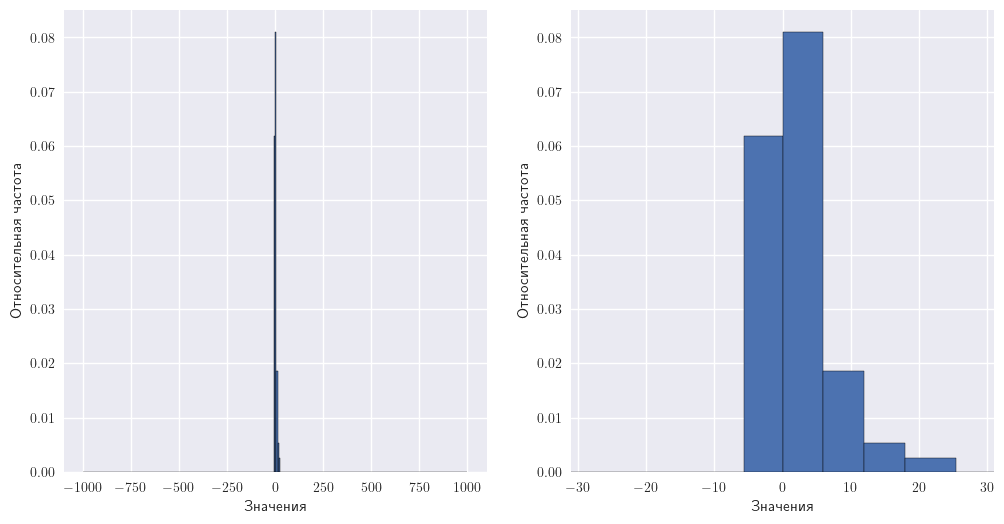

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[0].set_xlabel("Значения")
axes[0].set_ylabel("Относительная частота")

axes[1].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[1].set_xlabel("Значения")
axes[1].set_ylabel("Относительная частота")
plt.xlim(-31, 31)

plt.show()

Теперь мы чётко разбили всю числовую прямую на интервалы, для которых ожидаемые частоты $n \cdot p_i \gtrsim 5$.

In [71]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 5.69 до 988.17

| Число интервалов | Обоснование выбора числа интервалов                                                                               | Ширина интервалов   |
| ---------------- | ----------------------------------------------------------------------------------------------------------------- | ------------------- |
| 8                | $k \approx 1 + 1,3 \ln{n}$ - формула Стерджесса $\\n \cdot p_i \gtrsim 5$ - поправка на чувствительность критерия | от 5.69 до $\infty$ |



### Построить таблицу частот

In [72]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency"] = groups.apply(
    lambda row: ((X >= row["low edge"]) & (X < row["high edge"])).sum(), axis=1
)
groups["relative frequency"] = groups["frequency"] / n
groups["expected probability"] = expected_frequencies / n
groups

,low edge,high edge,frequency,relative frequency,expected probability
Номер интервала,,,,,
1,-1000.000000,-11.825969,0,0.000000,0.110138
2,-11.825969,-5.651338,0,0.000000,0.124173
3,-5.651338,0.043645,111,0.352381,0.162128
4,0.043645,5.921558,150,0.476190,0.188450
5,5.921558,11.910512,35,0.111111,0.173279
6,11.910512,17.910648,10,0.031746,0.124284
7,17.910648,25.375000,6,0.019048,0.081068
8,25.375000,1000.000000,3,0.009524,0.036482


In [73]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | expected probability |
|---|---|---|---|---|---|
| 1 | -1000.0 | -11.83 | 0.0 | 0.0 | 0.11 |
| 2 | -11.83 | -5.65 | 0.0 | 0.0 | 0.12 |
| 3 | -5.65 | 0.04 | 111.0 | 0.35 | 0.16 |
| 4 | 0.04 | 5.92 | 150.0 | 0.48 | 0.19 |
| 5 | 5.92 | 11.91 | 35.0 | 0.11 | 0.17 |
| 6 | 11.91 | 17.91 | 10.0 | 0.03 | 0.12 |
| 7 | 17.91 | 25.38 | 6.0 | 0.02 | 0.08 |
| 8 | 25.38 | 1000.0 | 3.0 | 0.01 | 0.04 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Вероятность попадания в интервал при условии истинности основной гипотезы |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------------------------------------------------------------- |
| 1               | $-\infty$      | -11.83          | 0.0     | 0.0                   | 0.11                                                                      |
| 2               | -11.83         | -5.65           | 0.0     | 0.0                   | 0.12                                                                      |
| 3               | -5.65          | 0.04            | 111.0   | 0.35                  | 0.16                                                                      |
| 4               | 0.04           | 5.92            | 150.0   | 0.48                  | 0.19                                                                      |
| 5               | 5.92           | 11.91           | 35.0    | 0.11                  | 0.17                                                                      |
| 6               | 11.91          | 17.91           | 10.0    | 0.03                  | 0.12                                                                      |
| 7               | 17.91          | 25.38           | 6.0     | 0.02                  | 0.08                                                                      |
| 8               | 25.38          | $+\infty$       | 3.0     | 0.01                  | 0.04                                                                      |

### Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике

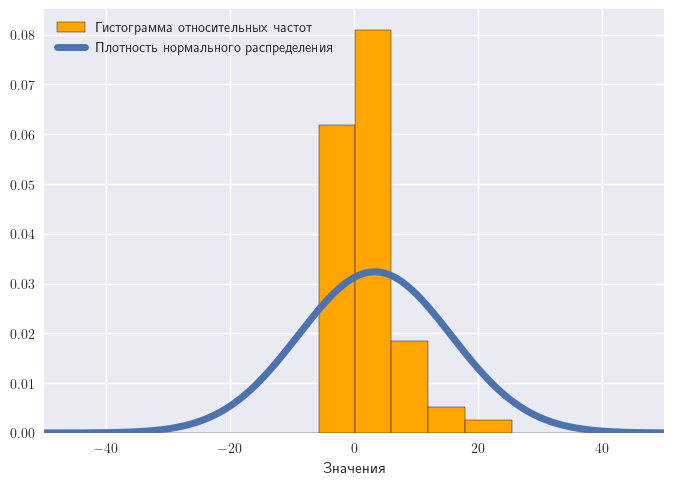

In [74]:
grid = np.linspace(X.min() - 100, X.max() + 100, 1000)
plt.hist(
    X,
    bins=bin_edges,
    edgecolor="black",
    density=True,
    label="Гистограмма относительных частот",
    color="orange",
)

plt.plot(
    grid,
    stats.norm.pdf(grid, loc=X.mean(), scale=X.std(ddof=1)),
    label="Плотность нормального распределения",
    lw=5,
)
plt.legend()
plt.xlim(-50, 50)
plt.xlabel("Значения")
plt.show()

### Проверить статистические гипотезы

In [75]:
alphas = [0.01, 0.05, 0.1]

z, p_value = stats.chisquare(groups["frequency"], expected_frequencies, ddof=2)
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 332.48

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

## 4.2. Критерий Харке-Бера

Статистическая гипотеза: $H_0:\ X \sim N;\ \ \ H':\ X \nsim N$

### Теоретическая справка

Критерий Харке-Бера (Jarque-Bera) - это критерий проверки гипотезы о нормальности выборки:

$H_0:\ X \sim N;\ \ \ H':\ X \nsim N$

Для проверки нормальности распределения нулевая гипотеза разбивается на две части:

$$H_0^{(1)}: \gamma_X = 0;\ \ \ H'^{(1)}: \gamma_X \neq 0$$
$$H_0^{(2)}: \varepsilon_X = 0;\ \ \ H'^{(2)}: \varepsilon_X \neq 0, где$$

$\gamma_X$ - [коэффициент асимметрии](#формулы), $\varepsilon_X$ - [эксцесс](#формулы).

Для этих гипотез используются следующие статистики:

$Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\ \ \ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$, при этом $Z_1 \mid_{H_0^{(1)}} \sim N(0, 1);\ \ \ Z_2 \mid_{H_0^{(2)}} \sim N(0, 1)$.

Если хоть одна $H_0^{(1)}$ или $H_0^{(2)}$ отклоняется, то исходная гипотеза $H_0$ отклоняется.

Для проверки основной гипотезы строится общая статистика: $Z = Z_1^2 + Z_2^2$, при этом $Z \mid_{H_0} \sim \chi^2(2)$. Критическая область - правосторонняя.

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = Z^2_1 + Z^2_2$, где $\\Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\\ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$ | $\gamma^*_X$ - [выборочный коэффициент асимметрии](#формулы), $\\ \varepsilon^*_X$ - [выборочный эксцесс](#формулы), $\\ n$ - объём выборки. |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(2)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ 2}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Проверить статистические гипотезы

In [76]:
z, p_value = stats.jarque_bera(X)
mprint(
    r"### Jarque-Bera test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Jarque-Bera test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 632630.74

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод       |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ----------- |
| 0.01               | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |
| 0.05               | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |
| 0.1                | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |

## Вывод (в терминах предметной области):

В результате проведённого в п.4 статистического анализа обнаружено, что оба критерия согласия отвергают гипотезу о нормальности распределения величины `C9`, поэтому можно сделать вывод, что `C9` (Number of alcoholic drinks consumed per week) не имеет нормального распределения.

# Раздел 5. Проверка однородности выборок

## Условие

Анализируемый признак 1 – `C11` (Dietary beta-carotene consumed (mcg per day))

Анализируемый признак 2 – `C12` (Dietary retinol consumed (mcg per day))

Объёмы выборок – $n_1 = n_2 = 315$

## Определения

In [77]:
X, Y = data("5")

X.head(), Y.head()

(0    1945
 1    2653
 2    6321
 3    1061
 4    2863
 Name: C11, dtype: int64,
 0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64)

In [78]:
print(n1 := len(X), n2 := len(Y))

315 315


## 5.1 Критерий знаков

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x);\ \ \ H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{K_+ - \dfrac{n}{2}}{\sqrt{\dfrac{n}{4}}}$ | $K_+$ - количество знаков `+` в выборке $z_1, \dots, z_n = x_1 - y_1, \dots, x_n - y_n$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $N(0, 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\pm u_{1 - \frac{\alpha}{2}}$                                                                                                         | Двусторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                                |                                                                                                                                         |


### Проверить статистические гипотезы

In [79]:
def sign_test(X, Y):
    if len(X) != len(Y):
        raise ValueError("Длины выборок должны совпадать")
    n = len(X)
    k = sum(X > Y)
    z = (k - n / 2) / m.sqrt(n / 4)
    p_value = 2 * min(stats.norm.cdf(z), 1 - stats.norm.cdf(z))
    return z, p_value

In [80]:
alphas = [0.01, 0.05, 0.1]

z, p_value = sign_test(X, Y)
mprint(
    r"### Sign test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Sign test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 14.03

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 14.03                                        | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | 14.03                                        | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | 14.03                                        | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

## 5.2 Критерий $\chi^2$

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x);\ \ \ H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = nm\sum\limits_{i=1}^{k}\dfrac{1}{n_i+m_i}\left(\dfrac{n_i}{n} + \dfrac{m_i}{m}\right)$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $m_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $n$ - объём выборки $x_1, \dots, x_n$ $\\$ $m$ - объём выборки $y_1, \dots, y_m$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - 1}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Выбрать число групп

Обычно выбирают число групп по формуле Стерджесса: $k \approx 1 + 1,3 \ln{\max(n, m)}$.

Однако критерий $\chi^2$ чувствителен к группам, для которых $n_i + m_i$ меньше 5. Поэтому при группировке нужно учитывать это.

Рассмотрим данный пример:

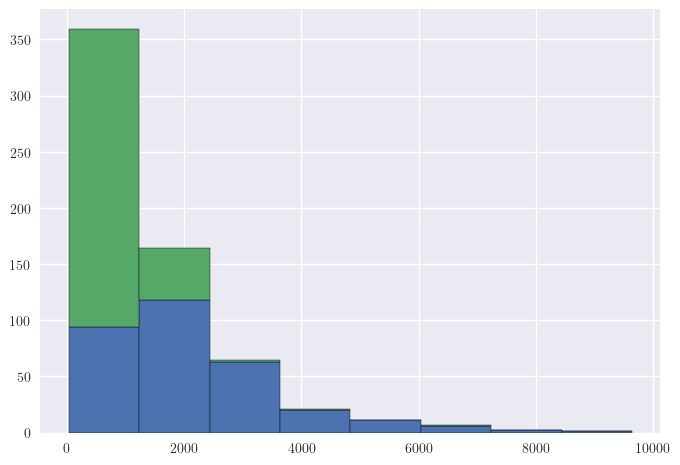

In [81]:
k = round(1 + 1.3 * m.log(max(n1, n2)))

frequences, bin_edges, _ = plt.hist((X, Y), bins=k, edgecolor="black", stacked=True)
plt.show()

Посмотрим на значения $n_i + m_i$ для каждого интервала.

In [82]:
frequences[1]

array([359., 164.,  65.,  21.,  11.,   7.,   2.,   1.])

Как видим, для последних двух интервалов $n_i + m_i < 5$. Условие $n_i + m_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [83]:
def merge_interval(bin_edges, frequences1, frequences2, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        frequences1[i + 1] += frequences1[i]
        frequences2[i + 1] += frequences2[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        frequences1[i - 1] += frequences1[i]
        frequences2[i - 1] += frequences2[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if (
            frequences1[i - 1] + frequences2[i - 1]
            < frequences1[i + 1] + frequences2[i + 1]
        ):
            bin_edges.pop(i)
            frequences1[i - 1] += frequences1[i]
            frequences2[i - 1] += frequences2[i]
        else:
            bin_edges.pop(i + 1)
            frequences1[i + 1] += frequences1[i]
            frequences2[i + 1] += frequences2[i]
    frequences1.pop(i)
    frequences2.pop(i)

In [84]:
def adjust_intervals(bin_edges, X1, X2, k=None):
    """
    Функция для корректировки интервалов и частот попадания в них
    bin_edges: Границы интервалов
    X1: Первая выборка
    X2: Вторая выборка
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой частотой попадания с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой частотой попадания, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых частота попадания большая, таким образом получая на выходе k >= len(intervals).
    """
    frequences1, _ = np.histogram(X1, bins=bin_edges)
    frequences2, _ = np.histogram(X2, bins=bin_edges)
    frequences1 = frequences1.tolist()
    frequences2 = frequences2.tolist()

    # Слияние интервалов с малой частотой попадания
    i = 0
    while True:
        if frequences1[i] + frequences2[i] < 5:
            merge_interval(bin_edges, frequences1, frequences2, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной частотой попадания
    if k is not None:
        while len(bin_edges) < k + 1:
            total_frequency = [x + y for x, y in zip(frequences1, frequences2)]
            max_frequency = max(total_frequency)

            # если максимальная частота меньше 5, то нельзя подразбивать интервалы
            if max_frequency < 10:
                break

            max_index = total_frequency.index(max_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что частота попадания в интервалах (a, c) и (c, b) как минимум 5
            c = (a + b) / 2

            frequences1[max_index] = ((X1 >= a) & (X1 < c)).sum()
            frequences2[max_index] = ((X2 >= a) & (X2 < c)).sum()
            frequences1.insert(max_index + 1, ((X1 >= c) & (X1 < b)).sum())
            frequences2.insert(max_index + 1, ((X2 >= c) & (X2 < b)).sum())
            bin_edges.insert(max_index + 1, c)

    return bin_edges, frequences1, frequences2

In [85]:
bin_edges, frequences1, frequences2 = adjust_intervals(bin_edges.tolist(), X, Y, k=k)
np.array(frequences1) + np.array(frequences2)

array([146, 122,  91, 164,  65,  21,  11,  10])

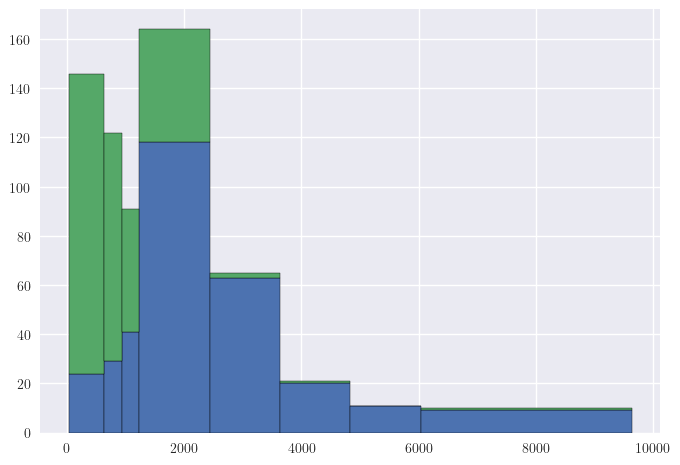

In [86]:
frequences, bin_edges, _ = plt.hist(
    (X, Y), bins=bin_edges, edgecolor="black", stacked=True
)
plt.show()

In [87]:
frequences[1]

array([146., 122.,  91., 164.,  65.,  21.,  11.,  10.])

Теперь группировка выборок проведена правильно.

In [88]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 300.38 до 3604.50

| Число интервалов | Обоснование выбора числа интервалов                                                                                     | Ширина интервалов    |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------- | -------------------- |
| 8                | $k \approx 1 + 1.3 \ln \max(n, m)$ - формула Стерджесса $\\n_i + m_i \gtrsim 5$ - поправка на чувствительность критерия | от 300.38 до 3604.50 |



### Построить таблицу частот

In [89]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency1"] = frequences[0]
groups["frequency2"] = frequences[1] - frequences[0]
groups["relative frequency1"] = groups["frequency1"] / n1
groups["relative frequency2"] = groups["frequency2"] / n2

groups

,low edge,high edge,frequency1,frequency2,relative frequency1,relative frequency2
Номер интервала,,,,,,
1,30.000,630.750,24.0,122.0,0.076190,0.387302
2,630.750,931.125,29.0,93.0,0.092063,0.295238
3,931.125,1231.500,41.0,50.0,0.130159,0.158730
4,1231.500,2433.000,118.0,46.0,0.374603,0.146032
5,2433.000,3634.500,63.0,2.0,0.200000,0.006349
6,3634.500,4836.000,20.0,1.0,0.063492,0.003175
7,4836.000,6037.500,11.0,0.0,0.034921,0.000000
8,6037.500,9642.000,9.0,1.0,0.028571,0.003175


In [90]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency1 | frequency2 | relative frequency1 | relative frequency2 |
|---|---|---|---|---|---|---|
| 1 | 30.0 | 630.75 | 24.0 | 122.0 | 0.08 | 0.39 |
| 2 | 630.75 | 931.12 | 29.0 | 93.0 | 0.09 | 0.3 |
| 3 | 931.12 | 1231.5 | 41.0 | 50.0 | 0.13 | 0.16 |
| 4 | 1231.5 | 2433.0 | 118.0 | 46.0 | 0.37 | 0.15 |
| 5 | 2433.0 | 3634.5 | 63.0 | 2.0 | 0.2 | 0.01 |
| 6 | 3634.5 | 4836.0 | 20.0 | 1.0 | 0.06 | 0.0 |
| 7 | 4836.0 | 6037.5 | 11.0 | 0.0 | 0.03 | 0.0 |
| 8 | 6037.5 | 9642.0 | 9.0 | 1.0 | 0.03 | 0.0 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота признака 1 | Частота признака 2 | Относительная частота признака 1 | Относительная частота признака 2 |
| --------------- | -------------- | --------------- | ------------------ | ------------------ | -------------------------------- | -------------------------------- |
| 1               | 30.0           | 630.75          | 24.0               | 122.0              | 0.08                             | 0.39                             |
| 2               | 630.75         | 931.12          | 29.0               | 93.0               | 0.09                             | 0.3                              |
| 3               | 931.12         | 1231.5          | 41.0               | 50.0               | 0.13                             | 0.16                             |
| 4               | 1231.5         | 2433.0          | 118.0              | 46.0               | 0.37                             | 0.15                             |
| 5               | 2433.0         | 3634.5          | 63.0               | 2.0                | 0.2                              | 0.01                             |
| 6               | 3634.5         | 4836.0          | 20.0               | 1.0                | 0.06                             | 0.0                              |
| 7               | 4836.0         | 6037.5          | 11.0               | 0.0                | 0.03                             | 0.0                              |
| 8               | 6037.5         | 9642.0          | 9.0                | 1.0                | 0.03                             | 0.0                              |

### Построить гистограммы относительных частот на одном графике

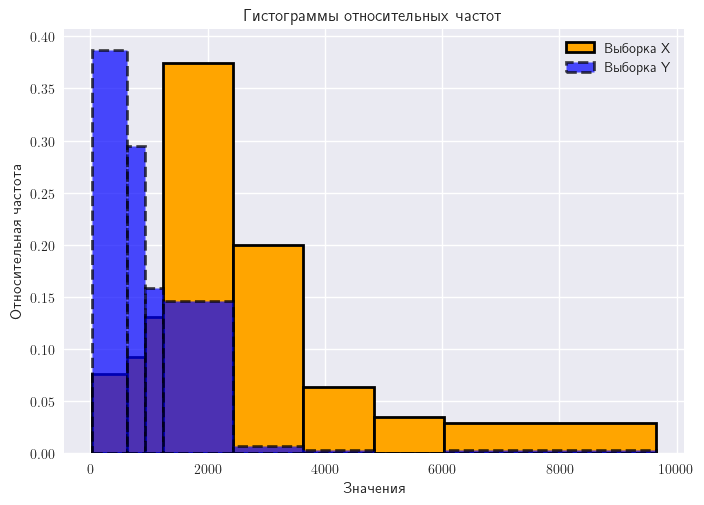

In [91]:
plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency1"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка X",
    color="orange",
    lw=2,
)

plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency2"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка Y",
    alpha=0.7,
    linestyle="--",
    lw=2,
    color="blue",
)
plt.legend()
plt.title("Гистограммы относительных частот")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

### Проверить статистические гипотезы

In [92]:
def chi2_2samp(frequencies1, frequencies2):
    if len(frequencies1) != len(frequencies2):
        raise ValueError("Длины выборок должны совпадать")
    k = len(frequencies1)
    n = sum(frequencies1)
    m = sum(frequencies2)
    z = (
        n
        * m
        * sum(
            (frequencies1 / n - frequencies2 / m) ** 2 / (frequencies1 + frequencies2)
        )
    )
    p_value = stats.chi2.sf(z, df=k - 1)
    return z, p_value

In [93]:
alphas = [0.01, 0.05, 0.1]

z, p_value = chi2_2samp(groups["frequency1"], groups["frequency2"])
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 223.69

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 223.69                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | 223.69                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | 223.69                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.5 статистического анализа обнаружено, что выборки `С11` (Dietary beta-carotene consumed (mcg per day)) и `C12` (Dietary retinol consumed (mcg per day)) неоднородны.

# Раздел 6. Таблицы сопряжённости

## Условие

Факторный признак $x$ - `C2` (Sex)

Результативный признак $y$ - `C5` (Vitamin Use)

Объёмы выборок - $n_1 = n_2 = n = 315$

Статистическая гипотеза $H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y);\ \ \ H':\ \exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$

## Определения

In [94]:
X, Y = data("6")
X.head(), Y.head()

(0    Female
 1    Female
 2    Female
 3    Female
 4    Female
 Name: C2, dtype: object,
 0        Often
 1        Often
 2    Not often
 3           No
 4        Often
 Name: C5, dtype: object)

In [95]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

315 315


## Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                               | Пояснение использованных обозначений                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула рассчёта статистики критерия                                             | $Z = \sum\limits_{i=1}^{k_1}\sum\limits_{j=1}^{k_2}\dfrac{(n_{ij} - m_{ij})^2}{m_{ij}}$ | $(x_1, y_1), \dots, (x_n, y_n)$ - наблюдения случайного вектора $(X, Y)$, где $X, Y$ - случайные величины дискретного типа $\\$ $x^{(1)}, \dots, x^{(k_1)}$ - варианты признака $X$ $\\$ $y^{(1)}, \dots, y^{(k_2)}$ - варианты признака $Y$ $\\$ $n_{ij}$ - выборочная частота варианта $(x^{(i)}, y^{(j)})$ в выборке $(x_1, y_1), \dots, (x_n, y_n)$ $\\$ $m_{ij}$ - теоретическая частота варианта  $(x^{(i)}, y^{(j)})$ в выборке $(x_1, y_1), \dots, (x_n, y_n)$ при условии истинности $H_0$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2((k_1 - 1)(k_2 - 1))$                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Формула расчета критической точки                                                | $\chi^2_{1 - \alpha,\ (k_1 - 1)(k_2 -1)}$                                               | Правосторонняя критическая область                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Формула расчета p-value                                                          | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |


## Построить эмпирическую таблицу сопряжённости

In [96]:
df = pd.DataFrame({"X": X, "Y": Y})
df

,X,Y
0,Female,Often
1,Female,Often
2,Female,Not often
3,Female,No
4,Female,Often
...,...,...
310,Female,No
311,Female,Often
312,Female,Often
313,Female,Often


In [97]:
emperical_table = pd.crosstab(df["X"], df["Y"], margins=True)
emperical_table

Y,No,Not often,Often,All
X,,,,
Female,87,77,109,273
Male,24,5,13,42
All,111,82,122,315


In [98]:
print(dataframe_to_markdown(emperical_table))

| X\Y | No | Not often | Often | All |
|---|---|---|---|---|
| Female | 87 | 77 | 109 | 273 |
| Male | 24 | 5 | 13 | 42 |
| All | 111 | 82 | 122 | 315 |



| Index  | No  | Not often | Often | All |
| ------ | --- | --------- | ----- | --- |
| Female | 87  | 77        | 109   | 273 |
| Male   | 24  | 5         | 13    | 42  |
| All    | 111 | 82        | 122   | 315 |

| Вариант X\Вариант Y | $y^{(1)}$ | $y^{(2)}$ | $y^{(3)}$ | $\sum$ |
| ------------------- | --------- | --------- | --------- | ------ |
| $x^{(1)}$           | 87        | 77        | 109       | 273    |
| $x^{(2)}$           | 24        | 5         | 13        | 42     |
| $\sum$              | 111       | 82        | 122       | 315    |

## Построить теоретическую таблицу сопряжённости

### Теоретическая справка

Пусть $H_0$ верна. Тогда $F_Y(y \mid_{X = x^{(i)}}) = F_Y(y)$. У нас дискретные случайные величины, поэтому это эквивалентно $P\left[Y = y^{(j)} \mid X = x^{(i)}\right] = P\left[Y = y^{(j)}\right]$.

Это значит, что случайные величины $X$ и $Y$ независимы. Значит $P\left[X = x^{(i)}, Y = y^{(j)}\right] = P\left[X = x^{(i)}\right] \cdot P\left[Y = y^{(j)}\right] \Leftrightarrow p_{ij} = p_i \cdot p_j = \sum\limits_{k = 1}^{k_2}p_{ik} \cdot \sum\limits_{l=1}^{k_1}p_{lj}$.

Теоретические частоты отсюда легко находятся: $m_{ij} = n \cdot p_{ij} = n \cdot \sum\limits_{k = 1}^{k_2}p_{ik} \cdot \sum\limits_{l=1}^{k_1}p_{lj} = n \cdot \sum\limits_{k = 1}^{k_2}\dfrac{n_{ik}}{n} \cdot \sum\limits_{l=1}^{k_1}\dfrac{n_{lj}}{n} = \dfrac{\sum\limits_{k = 1}^{k_2}n_{ik} \cdot \sum\limits_{l=1}^{k_1}n_{lj}}{n}$.

Итак, для начала получим матрицу $A = \|a_{ij}\|_{k_1 \times k_2}$, где $a_{ij} = \sum\limits_{k = 1}^{k_2}n_{ik} \cdot \sum\limits_{l=1}^{k_1}n_{lj}$

Матрицу $A$ можно получить простым матричным произведением:

$$
A = \overrightarrow{V_1}^T \cdot \overrightarrow{V_2} = \begin{pmatrix}
\sum\limits_{k = 1}^{k_2}n_{1k} \\
\sum\limits_{k = 1}^{k_2}n_{2k} \\
\vdots \\
\sum\limits_{k = 1}^{k_2}n_{k_1k} \\
\end{pmatrix} \cdot \begin{pmatrix} \sum\limits_{l=1}^{k_1}n_{l1} & \sum\limits_{l=1}^{k_1}n_{l2} & \cdots & \sum\limits_{l=1}^{k_1}n_{lk_2} \end{pmatrix} = 
\begin{pmatrix} 
\sum\limits_{k = 1}^{k_2}n_{1k} \cdot \sum\limits_{l=1}^{k_1}n_{l1} & \cdots & \sum\limits_{k = 1}^{k_2}n_{1k} \cdot \sum\limits_{l=1}^{k_1}n_{lk_2} \\
\cdots & \ddots & \cdots \\
\sum\limits_{k = 1}^{k_2}n_{k_1k} \cdot \sum\limits_{l=1}^{k_1}n_{l1} &  \cdots & \sum\limits_{k = 1}^{k_2}n_{k_1k} \cdot \sum\limits_{l=1}^{k_1}n_{lk_2} \\
\end{pmatrix}
$$


Получаем $\overrightarrow{V_1}^T$:

In [99]:
V1 = np.array(emperical_table.iloc[:-1, -1])
V1

array([273,  42])

In [100]:
V1 = np.atleast_2d(V1).T
V1

array([[273],
       [ 42]])

Получаем $\overrightarrow{V_2}$:

In [101]:
V2 = np.array(emperical_table.iloc[-1][:-1])
V2

array([111,  82, 122])

In [102]:
V2 = np.atleast_2d(V2)
V2

array([[111,  82, 122]])

Получаем матрицу $A$:

In [103]:
A = np.dot(V1, V2)
A

array([[30303, 22386, 33306],
       [ 4662,  3444,  5124]])

Строим теоретическую таблицу сопряжённости:

In [104]:
theoretical_table = pd.DataFrame(
    A / n,
    index=emperical_table.index[:-1],
    columns=emperical_table.columns[:-1],
)
theoretical_table

Y,No,Not often,Often
X,,,
Female,96.2,71.066667,105.733333
Male,14.8,10.933333,16.266667


Добавим в таблицу суммы по строкам и столбцам:

In [105]:
theoretical_table["All"] = theoretical_table.sum(axis=1)
theoretical_table.loc["All"] = theoretical_table.sum()
theoretical_table

Y,No,Not often,Often,All
X,,,,
Female,96.2,71.066667,105.733333,273.0
Male,14.8,10.933333,16.266667,42.0
All,111.0,82.000000,122.000000,315.0


In [106]:
print(dataframe_to_markdown(theoretical_table))

| X\Y | No | Not often | Often | All |
|---|---|---|---|---|
| Female | 96.2 | 71.07 | 105.73 | 273.0 |
| Male | 14.8 | 10.93 | 16.27 | 42.0 |
| All | 111.0 | 82.0 | 122.0 | 315.0 |



| X\Y    | No    | Not often | Often  | All   |
| ------ | ----- | --------- | ------ | ----- |
| Female | 96.2  | 71.07     | 105.73 | 273.0 |
| Male   | 14.8  | 10.93     | 16.27  | 42.0  |
| All    | 111.0 | 82.0      | 122.0  | 315.0 |


| Вариант X\Вариант Y | $y^{(1)}$ | $y^{(2)}$ | $y^{(3)}$ | $\sum$ |
| ------------------- | --------- | --------- | --------- | ------ |
| $x^{(1)}$           | 96.2      | 71.07     | 105.73    | 273.0  |
| $x^{(2)}$           | 14.8      | 10.93     | 16.27     | 42.0   |
| $\sum$              | 111.0     | 82.0      | 122.0     | 315.0  |
        

## Проверить статистические гипотезы

In [107]:
alphas = [0.01, 0.05, 0.1]

res = stats.chi2_contingency(emperical_table.iloc[:-1, :-1])
res

Chi2ContingencyResult(statistic=np.float64(11.070979092770376), pvalue=np.float64(0.003944277256603155), dof=2, expected_freq=array([[ 96.2       ,  71.06666667, 105.73333333],
       [ 14.8       ,  10.93333333,  16.26666667]]))

In [108]:
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    f"$H_0:\\ F_Y(y \\mid_{{X = x^{{(1)}}}}) = F_Y(y \\mid_{{X = x^{{(2)}}}}) = \\dots = F_Y(y \\mid_{{X = x^{{(k_1)}}}}) = F_Y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p)}")

### $\chi^2$-test

$H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y)$

$z_{выб} =$ 11.07

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                                                                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------------------------------------------------------ |
| 0.01               | 11.07                                        | 0.00       | $H_0$ отклоняется      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$ |
| 0.05               | 11.07                                        | 0.00       | $H_0$ отклоняется      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$ |
| 0.1                | 11.07                                        | 0.00       | $H_0$ отклоняется      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.6 статистического анализа обнаружено, что между факторным признаком `C2` и результативным признаком `C5` присутствует статистическая связь. Под действием `C2` оказывается влияние на распределение `C5`.

# Раздел 7. Дисперсионный анализ

## Условие

Факторный признак $x$ - `C5` (Vitamin Use)

Результативный признак $y$ - `C4` (Quetelet ($\dfrac{weight}{height^2}$))

Число вариантов факторного признака – $k = 3$

Объёмы выборок - $n_1 = n_2 = n = 315$

Статистическая гипотеза – $H_0:\ F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y);\ \ \ H':\ \exists i, j: F_Y(y \mid_{X = x_i}) \neq F_Y(y \mid_{X = x_j})$

## Определения

In [109]:
X, Y = data("7")
X.head(), Y.head()

(0        Often
 1        Often
 2    Not often
 3           No
 4        Often
 Name: C5, dtype: object,
 0    21.48380
 1    23.87631
 2    20.01080
 3    25.14062
 4    20.98504
 Name: C4, dtype: float64)

In [110]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

315 315


In [111]:
print(k := len(X.unique()))

3


## Рассчитать групповые выборочные характеристики

In [112]:
df = pd.DataFrame({"X": X, "Y": Y}).groupby("X")["Y"].apply(np.array).to_frame()
df

,Y
X,
No,"[25.14062, 27.52136, 23.07662, 34.96995, 31.73..."
Not often,"[20.0108, 22.01154, 36.43161, 23.15985, 33.724..."
Often,"[21.4838, 23.87631, 20.98504, 28.75702, 20.946..."


In [113]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="№ п/п"))
groups[r"$x^{(i)}$"] = df.index
groups[r"$n_i$"] = df["Y"].apply(len).values
groups[r"$\overline{y_i}$"] = df["Y"].apply(np.mean).values
groups[r"$s_i^2$"] = df["Y"].apply(np.var, ddof=0).values
groups

,$x^{(i)}$,$n_i$,$\overline{y_i}$,$s_i^2$
№ п/п,,,,
1,No,111,26.527564,34.214888
2,Not often,82,26.625975,41.238893
3,Often,122,25.505599,33.529748


In [114]:
print(dataframe_to_markdown(groups))

| № п/п | $x^{(i)}$ | $n_i$ | $\overline{y_i}$ | $s_i^2$ |
|---|---|---|---|---|
| 1 | No | 111 | 26.53 | 34.21 |
| 2 | Not often | 82 | 26.63 | 41.24 |
| 3 | Often | 122 | 25.51 | 33.53 |



| № п/п | $x^{(i)}$ | $n_i$ | $\overline{y_i}$ | $s_i^2$ |
| ----- | --------- | ----- | ---------------- | ------- |
| 1     | No        | 111   | 26.53            | 34.21   |
| 2     | Not often | 82    | 26.63            | 41.24   |
| 3     | Often     | 122   | 25.51            | 33.53   |

## Привести формулы расчёта показателей вариации, используемых в дисперсионном анализе

| Источник вариации      | Показатель вариации                                                                                                                                                                                     | Число степеней свободы | Несмещённая оценка                         |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------- | ------------------------------------------ |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}n_i(\overline{y_i} - \overline{y})^2$                                                                                                      | $k - 1$                | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}}$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}n_i\tilde{\sigma_i}^2$, где $\tilde{\sigma_i}^2 =  \dfrac{1}{n_i}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y_i}^2)$ - групповая дисперсия | $n - k$                | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}}$ |
| Все факторы            | $\tilde{D}_{\text{общ}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij}-\overline{y})^2$                                                                                              | $n - 1 $               | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}}$   |

## Рассчитать показатели вариации, используемые в дисперсионном анализе

In [115]:
S_general = float(Y.var(ddof=0))
S_inside = 1 / n * sum(groups[r"$n_i$"] * groups[r"$s_i^2$"])
S_between = (
    1 / n * sum(groups[r"$n_i$"] * (groups[r"$\overline{y_i}$"] - Y.mean()) ** 2)
)

S_general_unbiased = S_general * n / (n - 1)
S_inside_unbiased = S_inside * n / (n - k)
S_between_unbiased = S_between * n / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 0.27$

$\tilde{D}_{\text{внутр}} = 35.78$

$\tilde{D}_{\text{общ}} = 36.05$

$\tilde{D}_{\text{межгр, несмещ}} = 42.52$

$\tilde{D}_{\text{внутр, несмещ}} = 36.12$

$\tilde{D}_{\text{общ, несмещ}} = 36.16$

| Источник вариации      | Показатель вариации                | Число степеней свободы | Несмещённая оценка                                 |
| ---------------------- | ---------------------------------- | ---------------------- | -------------------------------------------------- |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = 0.27$  | $k - 1 = 3$            | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}} = 42.52$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = 35.78$ | $n - k = 248$          | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}} = 36.12$ |
| Все факторы            | $\tilde{D}_{\text{общ}} = 36.05$   | $n - 1 = 251$          | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}} = 36.16$   |

## Проверить правило сложения дисперсий

In [116]:
mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} + \\tilde{{D}}_{{\\text{{внутр}}}} = {S_between + S_inside:.2f}$",
)
print(S_between + S_inside - S_general < 1e-10)

$\tilde{D}_{\text{межгр}} = 0.27$

$\tilde{D}_{\text{внутр}} = 35.78$

$\tilde{D}_{\text{общ}} = 36.05$

$\tilde{D}_{\text{межгр}} + \tilde{D}_{\text{внутр}} = 36.05$

True


| Показатель | $\tilde{D}_{\text{межгр}}$ | $\tilde{D}_{\text{внутр}}$ | $\tilde{D}_{\text{общ}}$ | $\tilde{D}_{\text{межгр}} + \tilde{D}_{\text{внутр}}$ |
| ---------- | -------------------------- | -------------------------- | ------------------------ | ----------------------------------------------------- |
| Значение   | 0.27                       | 35.78                       | 36.05                     | 36.05                                                  |


## Рассчитать показатели тесноты связи между факторным и результативным признаками

In [117]:
eta_squared = S_between / S_general

eta = m.sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.01$

$\tilde{\eta} = 0.09$

| Показатель                            | Формула расчета                                                                                          | Значение |
| ------------------------------------- | -------------------------------------------------------------------------------------------------------- | -------- |
| Эмпирический коэффициент детерминации | $\tilde{\eta}^2 = \dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}}$                              | 0.02     |
| Эмпирическое корреляционное отношение | $\tilde{\eta} = \sqrt{\tilde{\eta}^2} = \sqrt{\dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}}}$ | 0.13     |


## Охарактеризовать тип связи между факторным и результативным признаками

По шкале Чеддока наблюдается отсутствие статистической связи между факторным признаком `С5` и результативным признаком `С4`.

## Указать формулы расчёта показателей, используемых при проверке статистической гипотезы дисперсионного анализа

|                                                                                  | Выражение                                                                        | Пояснение использованных обозначений                                       |
| -------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- | -------------------------------------------------------------------------- |
| Формула рассчёта статистики критерия                                             | $Z = \dfrac{n-k}{k-1}\dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{внутр}}}$ | $k$ - число групп $\\$ $n$ - объём выборки $y_1, \dots, y_n$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | F(k-1, n-k)                                                                      |                                                                            |
| Формула расчета критической точки                                                | $F_{1-\alpha, k-1, n-k}$                                                         | Правосторонняя критическая область                                         |
| Формула расчета p-value                                                          | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                               |                                                                            |


## Проверить статистическую гипотезу дисперсионного анализа

In [118]:
z, p_value = stats.f_oneway(*df["Y"])
z, p_value

(np.float64(1.1771842554005596), np.float64(0.3095099847543015))

In [119]:
alphas = [0.01, 0.05, 0.1]

z = S_between_unbiased / S_inside_unbiased
p_value = stats.f.sf(z, dfn=k - 1, dfd=n - k)
z, p_value

(1.1771842554005592, np.float64(0.3095099847543015))

In [120]:
mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3$",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### ANOVA

$H_0: m_1 = m_2 = m_3$

$z_{выб} = 1.18$

$p = 0.31$

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                                                                                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------------------------------------------------------------------------------------- |
| 0.01               | 1.18                                         | 0.31      | $H_0$ принимается      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y)$ |
| 0.05               | 1.18                                         | 0.31      | $H_0$ принимается      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y)$ |
| 0.1                | 1.18                                         | 0.31      | $H_0$ принимается      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y)$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.7 статистического анализа обнаружено, что между факторным признаком `C5` и результативным признаком `C4` отсутствует статистическая связь. Под действием `C5` не оказывается влияние на распределение `C4`.

# Раздел 8. Корреляционный анализ

## 8.1. Расчёт парных коэффициентов корреляции

### Условие

Анализируемый признак 1 – `C11` (Dietary beta-carotene consumed (mcg per day))

Анализируемый признак 2 – `C12` (Dietary retinol consumed (mcg per day))

Объёмы выборок – $n_1 = n_2 = n = 315$

### Определения

In [121]:
X, Y = data("8.1")
X.head(), Y.head()

(0    1945
 1    2653
 2    6321
 3    1061
 4    2863
 Name: C11, dtype: int64,
 0     890
 1     451
 2     660
 3     864
 4    1209
 Name: C12, dtype: int64)

In [122]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

315 315


### Рассчитать точечные оценки коэффициентов корреляции

In [123]:
rho_XY = stats.pearsonr(X, Y)[0]
rho_sp_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(
    f"$\\rho_{{XY}} = {rho_XY:.2f}$",
    f"$\\rho^{{(sp)}}_{{XY}} = {rho_sp_XY:.2f}$",
    f"$\\tau_{{XY}} = {tau_XY:.2f}$",
)

$\rho_{XY} = 0.05$

$\rho^{(sp)}_{XY} = 0.20$

$\tau_{XY} = 0.13$

|                                             | Формула расчёта                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | Значение |
| ------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------- |
| Линейный коэффициент корреляции             | $\tilde{\rho}_{XY} = \dfrac{\tilde{cov}(X, Y)}{\tilde{\sigma}_X \cdot \tilde{\sigma}_Y} = \dfrac{\sum\limits_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum\limits_{i=1}^{n}(x_i - \overline x)^2 \cdot \sum\limits_{i=1}^{n} (y_i - \overline y)^2}}$                                                                                                                                                                                                              | 0.05     |
| Ранговый коэффициент корреляции по Спирмену | $\tilde{\rho}^{(sp)}_{XY} = \tilde{\rho}_{RS}$, где $R$ и $S$ - ранги для выборок $X$ и $Y$ соответственно. $\\$ Можно показать, что $\tilde{\rho}^{(sp)}_{XY} = 1 - \dfrac{6S}{n(n^2 - 1)}$, где $S = \sum\limits_{i=1}^{n} (r_i - s_i)^2$                                                                                                                                                                                                                                        | 0.20     |
| Ранговый коэффициент корреляции по Кендаллу | $\tilde{\tau}_{XY} = \dfrac{N_+ - N_-}{n(n-1)/2}$,  где $\\$ $N_+,\  N_-$ - количество пар точек $(x_i, y_i)$ таких, что $\\$ $(x_i - x_j)(y_i - y_j) > 0,\ (x_i - x_j)(y_i - y_j) < 0$ соответственно. $\\$ Другой вариант расчёта:   $\tilde{\tau}_{XY} = \dfrac{4R}{n(n-1)} - 1$, где $\\$ $R = \sum\limits_{i=1}^{n}\sum\limits_{j=i+1}^{n}1[s_j > s_i]$ - число инверсий в выборке $(r_1, s_1), \dots, (r_n, s_n)$, $\\$ предварительно отсортированной по возрастанию $r_i$. | 0.13     |


### Привести формулы расчёта доверительного интервала для линейного коэффициента корреляции

Для выборок объёмов $n > 500$ и объёма $n \leq 500$ формулы расчёта различаются. Привожу для случая $n \leq 500$, так как у нас именно такая ситуация.

| Граница доверительного интервала | Формула расчёта |
| -------------------------------- | --------------- |
| Нижняя граница                   |$\th{\left(\dfrac{1}{2}\ln{\dfrac{1 + \tilde{\rho}}{1 - \tilde{\rho}}} + \dfrac{\tilde{\rho}}{2(n-1)}-\dfrac{u_{1 - \frac{\alpha}{2}}}{\sqrt{n-3}}\right)}$|
| Верхняя граница                  |  $\th{\left(\dfrac{1}{2}\ln{\dfrac{1 + \tilde{\rho}}{1 - \tilde{\rho}}} + \dfrac{\tilde{\rho}}{2(n-1)}+\dfrac{u_{1 - \frac{\alpha}{2}}}{\sqrt{n-3}}\right)}$               |


### Рассчитать доверительные интервалы для линейного коэффициента корреляции

In [124]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    u = stats.norm.ppf(1 - alpha / 2)
    z1 = (
        1 / 2 * m.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        - u / m.sqrt(n - 3)
    )
    z2 = (
        1 / 2 * m.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        + u / m.sqrt(n - 3)
    )
    intervals[f"$\\alpha = {alpha}$"] = [m.tanh(z1), m.tanh(z2)]
intervals

,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Граница доверительного интервала,,,
Нижняя граница,-0.092561,-0.057896,-0.040100
Верхняя граница,0.196249,0.162508,0.145091


In [125]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha = 0.01$ | $\alpha = 0.05$ | $\alpha = 0.1$ |
|---|---|---|---|
| Нижняя граница | -0.09 | -0.06 | -0.04 |
| Верхняя граница | 0.2 | 0.16 | 0.15 |



| Граница доверительного интервала | $\alpha = 0.01$ | $\alpha = 0.05$ | $\alpha = 0.1$ |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | -0.09           | -0.06           | -0.04          |
| Верхняя граница                  | 0.2             | 0.16            | 0.15           |

### Указать формулы расчёта показателей, используемых при проверке значимости коэффициентов корреляции

| Статистическая гипотеза                                      | Формула расчёта статистики критерия                                                                          | Закон распределения статистики критерия при условии истинности основной |
| ------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------- |
| $H_0:\ \rho_{XY} = 0 \\ H':\ \rho_{XY} \neq 0$               | $Z =  \dfrac{\tilde{\rho}_{XY} \cdot \sqrt{n-2}}{\sqrt{1 - \tilde{\rho}_{XY}^2}}$                            | $T(n - 2)$                                                              |
| $H_0:\ \rho_{XY}^{(sp)} = 0 \\ H':\ \rho_{XY}^{(sp)} \neq 0$ | $Z =  \dfrac{\tilde{\rho}_{XY}^{(sp)} \cdot \sqrt{n-2}}{\sqrt{1 - \left(\tilde{\rho}_{XY}^{(sp)}\right)^2}}$ | $T(n - 2)$                                                              |
| $H_0:\ \tau_{XY} = 0 \\ H':\ \tau_{XY} \neq 0$               | $\sqrt{\dfrac{9n(n+1)}{2(2n+5)}}\cdot \tilde{\tau}_{XY}$                                                     | $N(0, 1)$                                                               |


### Проверить значимость коэффициентов корреляции

In [126]:
alpha = 0.1

z_rho_XY = rho_XY * m.sqrt(n - 2) / m.sqrt(1 - rho_XY**2)
p_rho_XY = stats.pearsonr(X, Y)[1]

z_rho_sp_XY = rho_sp_XY * m.sqrt(n - 2) / m.sqrt(1 - rho_sp_XY**2)
p_rho_sp_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * m.sqrt(9 * n * (n + 1)) / m.sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\rho_{XY}^{(sp)}$",
    f"$H_0$: $\\rho_{{XY}}^{{(sp)}} = 0$, $H_1$: $\\rho_{{XY}}^{{(sp)}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_sp_XY:.2f}, ",
    f"$p =$ {p_rho_sp_XY:.2f}",
    verdict(alpha, p_rho_sp_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $\rho_{XY}$

$H_0$: $\rho_{XY} = 0$, $H_1$: $\rho_{XY} \neq 0$

$z_{выб} =$ 0.94, 

$p =$ 0.35

$H_0$ принимается

---

### $\rho_{XY}^{(sp)}$

$H_0$: $\rho_{XY}^{(sp)} = 0$, $H_1$: $\rho_{XY}^{(sp)} \neq 0$

$z_{выб} =$ 3.54, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\tau_{XY}$

$H_0$: $\tau_{XY} = 0$, $H_1$: $\tau_{XY} \neq 0$

$z_{выб} =$ 3.53, 

$p =$ 0.00

$H_0$ отклоняется

| Статистическая гипотеза                                      | Уровень значимости | Выборочное значение статистики критерия | $p$-value | Статистическое решение | Вывод                     |
| ------------------------------------------------------------ | ------------------ | --------------------------------------- | --------- | ---------------------- | ------------------------- |
| $H_0:\ \rho_{XY} = 0 \\ H':\ \rho_{XY} \neq 0$               | 0.01               | 0.94                                    | 0.35      | $H_0$ принимается      | $\rho_{XY} = 0$           |
| $H_0:\ \rho_{XY}^{(sp)} = 0 \\ H':\ \rho_{XY}^{(sp)} \neq 0$ | 0.01               | 3.54                                    | 0.00      | $H_0$ отклоняется      | $\rho_{XY}^{(sp)} \neq 0$ |
| $H_0:\ \tau_{XY} = 0 \\ H':\ \tau_{XY} \neq 0$               | 0.01               | 3.53                                    | 0.00      | $H_0$ отклоняется      | $\tau_{XY} \neq 0$        |


## 8.2. Расчёт множественных коэффициентов корреляции

### Условие

Анализируемый признак 1 – `C9` (Number of alcoholic drinks consumed per week)

Анализируемый признак 2 – `C10` (Cholesterol consumed (mg per day))

Анализируемый признак 3 – `C11` (Dietary beta-carotene consumed (mcg per day))

Объёмы выборок – $n = 315$

### Определения

In [127]:
X = pd.concat(data("8.2"), axis=1)
X.head()

,C9,C10,C11
0,0.0,170.3,1945
1,0.0,75.8,2653
2,14.1,257.9,6321
3,0.5,332.6,1061
4,0.0,170.8,2863


In [128]:
print(n := len(X))

315


In [129]:
print(k := X.shape[1])

3


### Рассчитать матрицу ранговых коэффициентов корреляции по Кендаллу

In [130]:
kendall_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
kendall_matrix.index.name = "Признак"
kendall_matrix.columns.name = "Признак"

p_value_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
p_value_matrix.index.name = "Признак"
p_value_matrix.columns.name = "Признак"

for i, col1 in enumerate(X.columns):
    for j, col2 in enumerate(X.columns):
        if i >= j:
            tau, p_value = stats.kendalltau(X[col1], X[col2])
            kendall_matrix.loc[col1, col2] = kendall_matrix.loc[col2, col1] = tau
            p_value_matrix.loc[col1, col2] = p_value_matrix.loc[col2, col1] = p_value

In [131]:
kendall_matrix

Признак,C9,C10,C11
Признак,,,
C9,1.000000,0.065335,0.044182
C10,0.065335,1.000000,0.129726
C11,0.044182,0.129726,1.000000


In [132]:
print(dataframe_to_markdown(kendall_matrix))

| Признак\Признак | C9 | C10 | C11 |
|---|---|---|---|
| C9 | 1.0 | 0.07 | 0.04 |
| C10 | 0.07 | 1.0 | 0.13 |
| C11 | 0.04 | 0.13 | 1.0 |



| Признак\Признак | C9   | C10  | C11  |
| --------------- | ---- | ---- | ---- |
| C9              | 1.0  | 0.07 | 0.04 |
| C10             | 0.07 | 1.0  | 0.13 |
| C11             | 0.04 | 0.13 | 1.0  |

### Рассчитать матрицу значений $p$-value для ранговых коэффициентов корреляции по Кендаллу

Статистическая гипотеза: $H_0:\ \tau = 0; \ \ \ H':\ \tau \neq 0$

In [133]:
p_value_matrix

Признак,C9,C10,C11
Признак,,,
C9,4.104617e-126,1.003981e-01,2.665729e-01
C10,1.003981e-01,2.181640e-154,5.954463e-04
C11,2.665729e-01,5.954463e-04,2.274839e-154


In [134]:
print(dataframe_to_markdown(p_value_matrix))

| Признак\Признак | C9 | C10 | C11 |
|---|---|---|---|
| C9 | 0.0 | 0.1 | 0.27 |
| C10 | 0.1 | 0.0 | 0.0 |
| C11 | 0.27 | 0.0 | 0.0 |



| Признак\Признак | C9   | C10 | C11  |
| --------------- | ---- | --- | ---- |
| C9              | 0.0  | 0.1 | 0.27 |
| C10             | 0.1  | 0.0 | 0.0  |
| C11             | 0.27 | 0.0 | 0.0  |

### Рассчитать точечную оценку коэффициента конкордации

Подсмотрел всё [здесь](http://www.machinelearning.ru/wiki/index.php?title=Конкордация_Кенделла).

$k = 3$ - число выборок.

$n = 252$ - объём каждой выборки.

$\tilde{W} = \dfrac{12}{k^2(n^3 - n)}\sum\limits_{i=1}^{n}\left(\sum\limits_{j=1}^{k}r_{ij} - \dfrac{k(n+1)}{2}\right)^2$, где $r_{ij}$ - ранг $i$-го объекта в $j$-й выборке.

In [135]:
ranks = X.rank()
ranks.columns.name = "Выборка"
ranks.index.name = "№ объекта"
ranks

Выборка,C9,C10,C11
№ объекта,,,
0,56.0,99.0,167.0
1,56.0,10.0,228.0
2,300.0,207.0,308.0
3,166.5,247.5,69.0
4,56.0,100.0,237.0
...,...,...,...
310,228.0,235.0,221.0
311,223.5,206.0,142.5
312,244.0,75.0,310.0


In [138]:
W = 12 / (k**2 * (n**3 - n)) * sum((ranks.sum(axis=1) - k * (n + 1) / 2) ** 2)

print(f"{W = :.2f}")

W = 0.41


|                         | Формула расчёта                                                                                                                                                                  | Значение |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------- |
| Коэффициент конкордации | $\tilde{W} = \dfrac{12}{k^2(n^3 - n)}\sum\limits_{i=1}^{n}\left(\sum\limits_{j=1}^{k}r_{ij} - \dfrac{k(n+1)}{2}\right)^2$, где $\\r_{ij}$ - ранг $i$-го объекта в $j$-й выборке. | 0.41     |


### Указать формулы расчёта показателей, используемых при проверке значимости коэффициента конкордации

Статистическая гипотеза: $H_0:\ W = 0;\ \ \ H':\ W \neq 0$.

|                                                                                  | Выражение                        | Пояснение использованных обозначений                                                                       |
| -------------------------------------------------------------------------------- | -------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = n(k-1)\tilde{W}$            | $\tilde W$ - точечная оценка коэффициента конкордации. $\\n$ - объём выборок. $\\k$ - количество выборок |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(n-1)$                    |                                                                                                            |
| Формула расчёта критической точки                                                | $\chi^2_{1 - \alpha, n-1}$       | Правосторонняя критическая область                                                                         |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$ |                                                                                                            |


### Проверить значимость коэффициента конкордации

In [137]:
alphas = [0.01, 0.05, 0.1]

z = n * (k - 1) * W
p_value = stats.chi2.sf(z, df=n - 1)

mprint(
    r"### Проверка значимости $W$",
    f"$H_0$: $W = 0$, $H_1$: $W \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости $W$

$H_0$: $W = 0$, $H_1$: $W \neq 0$

$z_{выб} =$ 255.27

$p =$ 0.99

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод   |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------- |
| 0.01               | 255.27                                       | 0.99      | $H_0$ принимается      | $W = 0$ |
| 0.05               | 255.27                                       | 0.99      | $H_0$ принимается      | $W = 0$ |
| 0.1                | 255.27                                       | 0.99      | $H_0$ принимается      | $W = 0$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.8 статистического анализа обнаружено, что между признаками `C11` и `C12` нет линейной корреляционной связи, однако существует слабая, но статистически значимая монотонная корреляционная связь. Между признаками `C9`, `C10`,  `C11` наблюдается отсутствие значимой монотонной связи между их парами. Наибольшая монотонная связь между `C10` и `C11`, притом она статистически значимая. Между остальными парами можно утверждать о том, что монотонная связь между ними отсутствует. Также общая согласованность рангов наблюдается слабая, статистически незначимая.